
# DAY 2: Euler’s Method for Numerical Solutions of Differential Equations

## 1. Introduction

We consider an **initial value problem (IVP)** for an ordinary differential equation (ODE):


\begin{cases}
\displaystyle \frac{dy}{dt} = f(t, y), \\
y(t_0) = y_0
\end{cases}


In many situations, an analytical solution is not available, and we must approximate the solution numerically.



## 2. Idea Behind Euler’s Method

Euler’s method comes from the first-order Taylor expansion:

$$
y(t_{n+1}) = y(t_n) + h y'(t_n) + \mathcal{O}(h^2)
$$

Using $ y'(t_n) = f(t_n, y_n) $, we obtain the update rule:

$$
y_{n+1} = y_n + h f(t_n, y_n)
$$

with

$$
t_{n+1} = t_n + h
$$



## 3. Algorithm

1. Choose step size $ h $ and number of steps $ N $
2. Set initial condition ($t_0$, $y_0$ )
3. Iterate:
   $
   y_{n+1} = y_n + h f(t_n, y_n)
   $


In [1]:

import numpy as np


In [2]:

def euler_method(f, t0, y0, h, n_steps):
    t = np.zeros(n_steps + 1)
    y = np.zeros((n_steps + 1,) if np.isscalar(y0) else (n_steps + 1, len(y0)))

    t[0] = t0
    y[0] = y0

    for n in range(n_steps):
        y[n + 1] = y[n] + h * f(t[n], y[n])
        t[n + 1] = t[n] + h

    return t, y



## 4. Example: Exponential Growth

$$
\frac{dy}{dt} = y, \quad y(0) = 1
$$

Exact solution: $$ y(t) = e^t $$


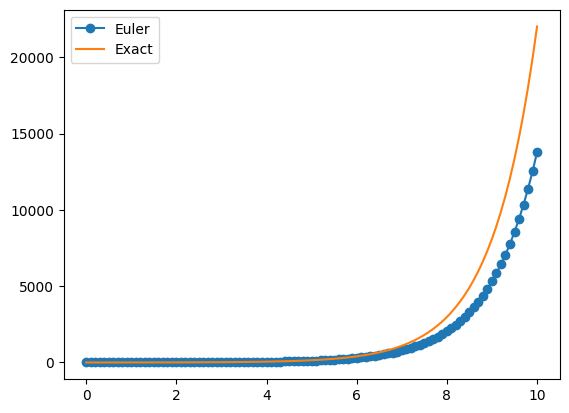

In [36]:

import matplotlib.pyplot as plt

def f(t, y):
    return y

t, y = euler_method(f, 0.0, 1.0, 0.1, 100)

t_exact = np.linspace(0, 10, 100)
y_exact =np.exp(t_exact)

plt.plot(t, y, 'o-', label='Euler')
plt.plot(t_exact, y_exact, label='Exact')
plt.legend()
plt.show()



## 5. Example: Simple Harmonic Oscillator

$$
\begin{cases}
x' = v \\
v' = -x
\end{cases}
$$,

with initial conditions $x(0)=1, \,v(0)=0$.

### Exact solution:
$x(t)=\cos(t)$, $v(t)=-\sin(t)$

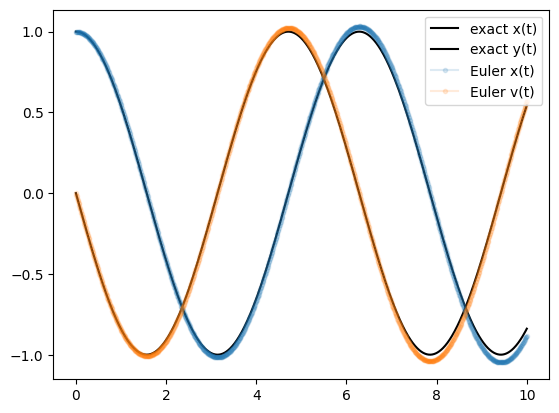

In [57]:

def oscillator(t, Y):
    x, v = Y
    return np.array([v, -x])

t, Y = euler_method(oscillator, 0.0, np.array([1.0, 0.0]), 0.01, 1000)
def x_exact(t):
    return np.cos(t)

def v_exact(t):
    return -1*np.sin(t)

plt.plot(t,x_exact(t),color="black",label='exact x(t)')
plt.plot(t,v_exact(t),color="black",label='exact y(t)')
plt.plot(t, Y[:,0], label='Euler x(t)',marker=".",alpha=0.15)
plt.plot(t, Y[:,1], label='Euler v(t)',marker=".",alpha=0.15)
plt.legend()
plt.show()



## 6. Exercises

### Exercise 1
Solve the ODE $$y' = -2y ,\ \  y(0) = 1 $$.  
Compare the numerical solution with the exact solution.

### Exercise 2
Investigate how the error changes when decreasing the step size \( h \).

### Exercise 3
Apply Euler’s method to the logistic equation:
$$
y' = y(1 - y),
$$
and compare the results with the exact solution. 

***Hint:*** The exact solution is $
y(t) = \frac{1}{1 + \left(\frac{1 - y_0}{y_0}\right)e^{-t}}.$

### Exercise 4
Modify the code to stop when \( t \) reaches a final time \( T \) instead of using a fixed number of steps.


# Solutions:

### Solution to Exercise 1
We solve: $y' = -2y, \quad y(0) = 1$

The exact solution is: $y(t) = e^{-2t} $

We compute the Euler approximation and compare it to the exact solution.

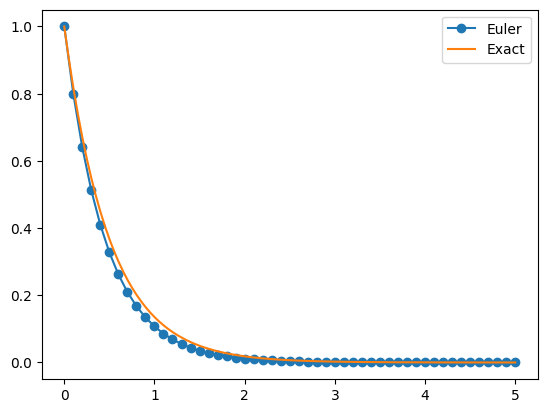

In [13]:

def f1(t, y):
    return -2*y

t, y_num = euler_method(f1, 0.0, 1.0, 0.1, 50)

t_exact = np.linspace(0, 5, 200)
y_exact = np.exp(-2*t_exact)

plt.plot(t, y_num, 'o-', label="Euler")
plt.plot(t_exact, y_exact, label="Exact")
plt.legend()
plt.show()


### Solution to Exercise 2

We repeat the computation with decreasing step sizes \( $h$ \) and observe
that the numerical solution converges to the exact one as \( $h$ to $0$ \).


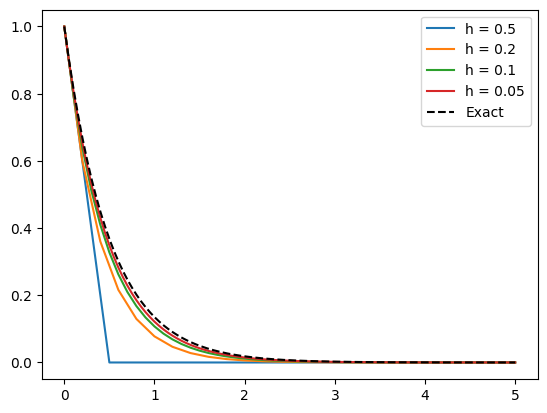

In [14]:

hs = [0.5, 0.2, 0.1, 0.05]

for h in hs:
    t, y_num = euler_method(f1, 0.0, 1.0, h, int(5/h))
    plt.plot(t, y_num, label=f"h = {h}")

plt.plot(t_exact, y_exact, 'k--', label="Exact")
plt.legend()
plt.show()


This confirms the **first-order convergence** of Euler’s method.


### Solution to Exercise 3

We apply Euler’s method to the logistic equation:

$
y' = y(1 - y), \quad y(0) = 0.1
$


#### Comparison with the Exact Solution (Exercise 3)

For the logistic equation

$
y' = y(1 - y), \quad y(0) = y_0
$

the exact solution is

$
y(t) = \frac{1}{1 + \left(\frac{1 - y_0}{y_0}\right)e^{-t}}.
$

We now compare the Euler approximation with the exact solution.


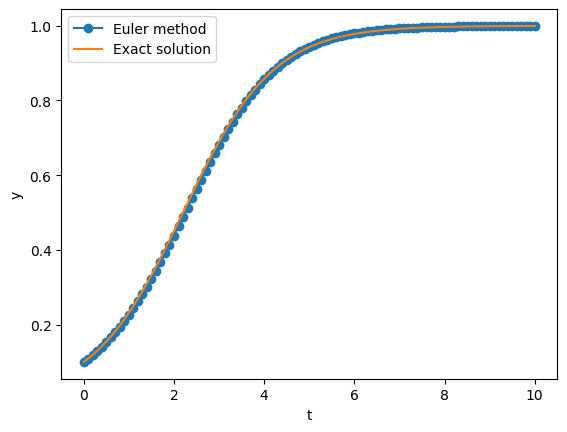

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Initial condition and parameters
y0 = 0.1
h = 0.1
n_steps = 100
t0 = 0.0

# Euler solution using the original euler_method
t, y_num = euler_method(lambda t, y: y*(1 - y), t0, y0, h, n_steps)

# Exact solution evaluated on a finer grid
t_exact = np.linspace(t0, t[-1], 400)
y_exact = 1 / (1 + ((1 - y0)/y0) * np.exp(-t_exact))

# Plot comparison
plt.plot(t, y_num, 'o-', label="Euler method")
plt.plot(t_exact, y_exact, label="Exact solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()



The solution grows initially and stabilizes near the equilibrium value $y = 1$ .



### Solution to Exercise 4

Instead of fixing the number of steps, we stop the method when
the final time \( T \) is reached.


In [21]:

def euler_until_T(f, t0, y0, h, T):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < T:
        y = y + h * f(t, y)
        t = t + h
        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)



This version is often more natural when simulating physical systems
up to a given final time.
